In [13]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Load epidemic italian data

In [14]:
from src.load_data import get_epidemic_data

In [15]:
df_epidemic = get_epidemic_data('Italy')
df_epidemic.head()

,Total cases,Active infected,Total deaths,Total recovered,Daily cases (avg 7 days),Daily deaths (avg 7 days)
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0


# Fit the epidemiological model

In [16]:
from src.epi_model import SIR
from src.optimizer import fit_simple_model

In [17]:
# We want to fit the 1st wave in Italy, therefore tmax=120 (5 months since the beginning)

def model_beta_costante(t1,t2,filename):

    # true data
    ydata_cases = np.array(df_epidemic['Total cases'])
    ydata_inf = np.array(df_epidemic['Active infected'])
    ydata_rec = (np.array(df_epidemic['Total recovered'])+np.array(df_epidemic['Total deaths']))

    ydata_cases = ydata_cases[t1:t2]
    ydata_inf   = ydata_inf[t1:t2]
    ydata_rec   = ydata_rec[t1:t2]
    data = pd.to_datetime(df_epidemic.index[t1:t2])

    ll = len(ydata_cases)

    inhabitants_italy = 60*10**6
    print(inhabitants_italy)

    minpar = fit_simple_model(y_data = [ydata_cases,ydata_inf,ydata_rec],
                       inhabitants=inhabitants_italy,
                       which_error='perc')


    beta = round(minpar[0],3)
    gamma = round(minpar[1],3)
    print('Parametri ottimizzati: beta',beta,'gamma',gamma)

    model_check = SIR(inhabitants_italy,minpar[0],minpar[1],
                  I0=ydata_inf[0],R0=ydata_rec[0])


    tmax = len(ydata_cases)

    plt.figure(figsize=(13,4.5))
    plt.subplot(1,3,1)
    plt.plot(data,inhabitants_italy-ydata_cases,label='Data',marker='.',color='blue')
    plt.plot(data,model_check[1][0:tmax],color='red',
             label='SIR model, $\\beta$='+str(beta)+', $\gamma$='+str(gamma))
    plt.title('Susceptible')
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()
    plt.subplot(1,3,2)
    plt.plot(data,ydata_inf,label='Data',marker='.',color='blue')
    plt.plot(data,model_check[2][0:tmax],color='red',
             label='SIR model, $\\beta$='+str(beta)+', $\gamma$='+str(gamma))
    plt.title('Infected')
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()
    plt.subplot(1,3,3)
    plt.plot(data,ydata_rec,label='Data',marker='.',color='blue')
    plt.plot(data,model_check[3][0:tmax],color='red',
             label='SIR model, $\\beta$='+str(beta)+', $\gamma$='+str(gamma))
    plt.title('Removed')
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(str(filename),dpi=300)
    plt.show()

# Risultati

### discese dal picco

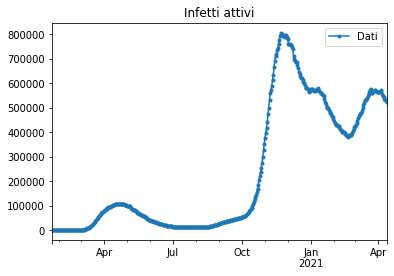

In [18]:
df_epidemic['Active infected'].plot(marker='.')
plt.title('Infetti attivi')
plt.legend(['Dati'])
plt.show()

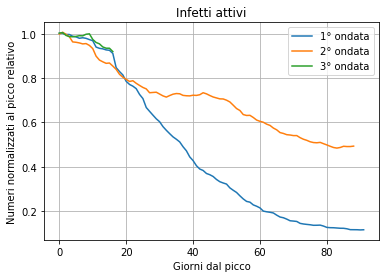

In [19]:
infetti_attivi = np.array(df_epidemic['Active infected'])

plt.plot(infetti_attivi[88:180]/108000,label='1° ondata')
plt.plot(infetti_attivi[311:400]/790000,label='2° ondata')
plt.plot(infetti_attivi[430:]/570000,label='3° ondata')
plt.legend()
plt.grid()
plt.xlabel('Giorni dal picco')
plt.ylabel('Numeri normalizzati al picco relativo')
plt.title('Infetti attivi')
plt.show()

### modelli epidemiologici

60000000
Optimization terminated successfully.
         Current function value: 1.285082
         Iterations: 52
         Function evaluations: 98
Error on susceptible 0.0 %
Error on infected 3.3 %
Error on removed 0.5 %
The average error of the model is 1.3 %
Parametri ottimizzati: beta 0.011 gamma 0.043


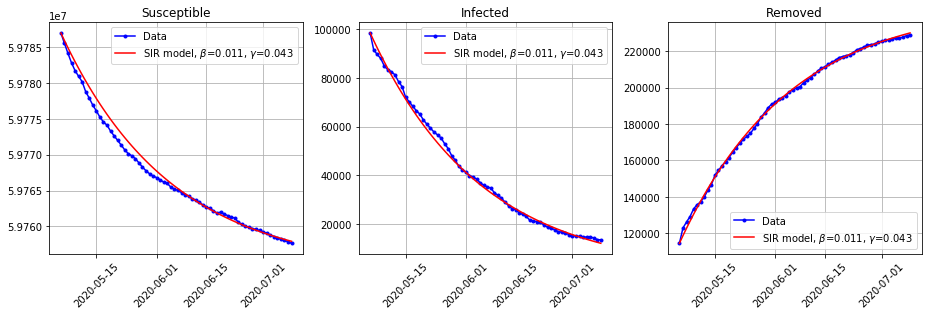

60000000
Optimization terminated successfully.
         Current function value: 1.548060
         Iterations: 46
         Function evaluations: 88
Error on susceptible 0.0 %
Error on infected 3.5 %
Error on removed 1.1 %
The average error of the model is 1.5 %
Parametri ottimizzati: beta 0.026 gamma 0.034


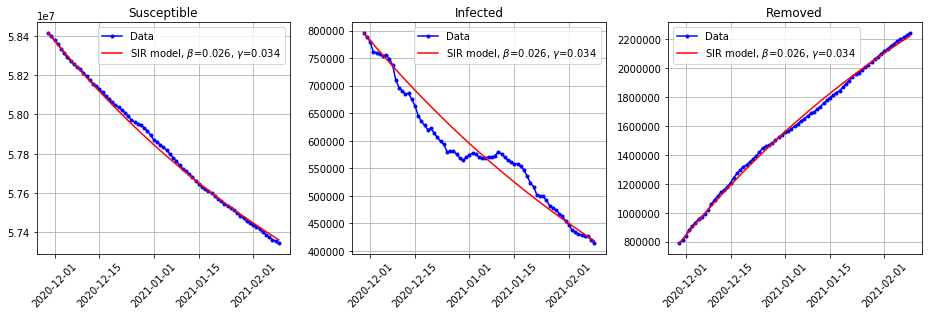

60000000
Optimization terminated successfully.
         Current function value: 0.125379
         Iterations: 55
         Function evaluations: 102
Error on susceptible 0.0 %
Error on infected 0.3 %
Error on removed 0.1 %
The average error of the model is 0.1 %
Parametri ottimizzati: beta 0.031 gamma 0.039


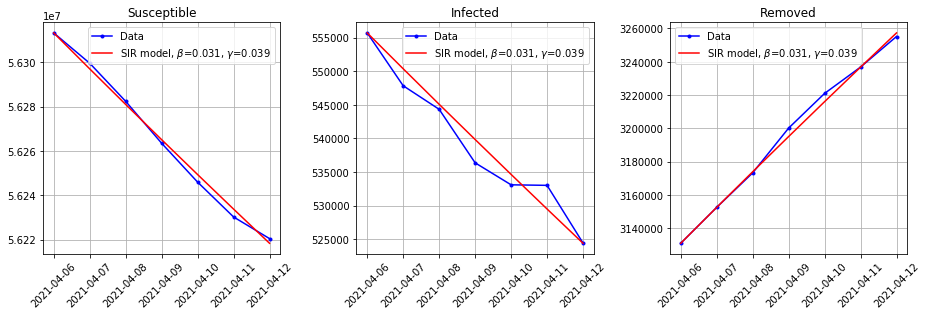

In [20]:
model_beta_costante(104,170,'results/discesa_ondata1.png')
#model_beta_costante(312,339,'results/discesa_ondata2a.png')
#model_beta_costante(354,385,'results/discesa_ondata2b.png')
model_beta_costante(312,385,'results/discesa_ondata2.png')
model_beta_costante(440,len(df_epidemic),'results/discesa_ondata3.png')